# <center> HW2 - Linear Discriminant Analysis, Perception Classification <center>

In [79]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
#maybe make dataframe and get data description.

X, y, centers = datasets.make_blobs(n_samples = 400, n_features = 4,
    centers=4, cluster_std = 2, random_state=100, return_centers=True)
# centers # this 


As we can see above, each array represents one of our blobs and each column represents a feature and its center

In [80]:

DF = pd.DataFrame.from_records(X)
DF.describe() 


,0,1,2,3
count,400.000000,400.000000,400.000000,400.000000
mean,-5.491490,-4.626276,1.047229,4.276850
std,4.468370,4.385843,5.406260,6.363439
min,-15.690104,-12.740153,-11.243356,-10.873853
25%,-8.611915,-8.043727,-3.653796,-0.133928
50%,-6.449392,-5.563121,1.389475,6.456682
75%,-2.158955,-1.412487,5.794436,8.754644
max,7.214880,7.273370,12.403710,15.967442


From the description above, we can get a general understanding for the entire dataset. It will be more useful to get the data report while separating per each cluster/blob. 

In [81]:
# Class 1 [0,100]
DF[0:100].describe() 

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-5.322886,-4.756153,1.776085,4.468637
std,4.591520,4.460561,4.896483,5.846670
min,-12.694688,-12.227846,-11.243356,-8.553390
25%,-9.203363,-7.943706,-2.233884,3.461484
50%,-6.366952,-5.462108,1.957509,6.180567
75%,-1.828789,-2.768855,6.173293,8.329729
max,7.214880,5.601424,11.707685,13.825977


In [82]:
# Class 2 [100,200]
DF[100:200].describe() 

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-5.184579,-4.759022,0.262281,4.506711
std,4.354314,4.322579,5.730522,6.522006
min,-15.655561,-11.737159,-10.844611,-10.288463
25%,-7.880050,-8.338802,-4.741193,2.365212
50%,-5.984302,-5.601267,-0.652467,7.027476
75%,-3.128195,-2.334520,5.048677,8.924774
max,6.310766,7.273370,11.826155,15.967442


In [83]:
# Class 3 [200,300]
DF[200:300].describe() 

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-6.232607,-4.395550,1.474967,4.107688
std,4.315477,4.574514,5.096143,6.592254
min,-14.449434,-12.443107,-10.287901,-8.688742
25%,-9.298119,-7.804656,-2.497092,-2.943040
50%,-7.661921,-5.613495,1.870769,6.643214
75%,-4.088967,-0.509850,5.551835,8.820407
max,3.986729,6.556008,11.131610,13.624034


In [84]:
# Class 4 [300,400]
DF[300:400].describe() 

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-5.225888,-4.594379,0.675582,4.024364
std,4.588571,4.234179,5.790325,6.545131
min,-15.690104,-12.740153,-10.168662,-10.873853
25%,-8.544990,-7.863865,-4.059328,-2.604749
50%,-5.922272,-5.334147,0.101706,6.500164
75%,-1.629995,-1.358350,6.003910,8.793164
max,4.937314,4.273434,12.403710,13.283567


If we look carefully at the means for the descriptions for each blob, we can generally see how our model will make classification decisions as it would be in reduced dimensions. By looking at the means and separations of different features, we would be able to classify via thresholds in a piecewise and systematic fashion. 

For example, the blobs from [0,100] and [100,200] (lets say class 1 and class 2) share similar features for X1, X2, and X4. However, we can see the mean for class 1 (1.776) is well above 1 and the mean for class 2 (0.2623) is well below 1. In this way, we can distinguish between class 1 and class 2 leveraging our educated assumptions of normality and homoscedasticity. We may not use this particular decision criterion, but the general premise for classification will follow this idea in the LDA process.

### Fig. A (Scatter Plot before LDA)

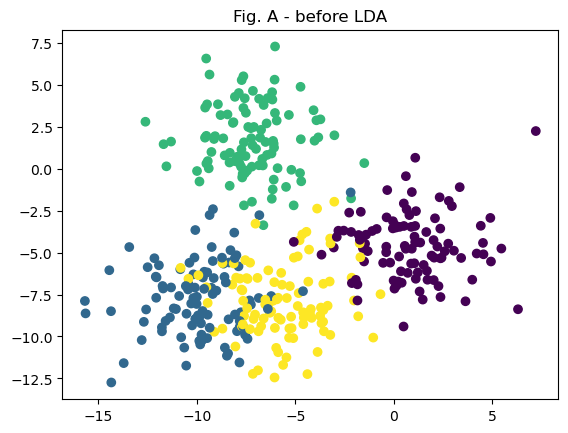

In [85]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)
plt.title("Fig. A - before LDA")
plt.show()


Though the above graphic does not represent the 4-dimensions that our data is in, it does effectively show that our 4 clusters are centered in their own position and gives us the opportunity to project points into a new 2-dimensional space using knowledge of the within class and between class scatter metrics (matrix) in order to make points of the same class closer together and those of different classes further apart in order to employ our decision-making criterion. It would be impossible to classify the points with high accuracy without performing dimensional reduction techniques of LDA.

a. [20 pts] Modify the within-class (Sw) and between-class (SB) functions in the lecture
 note to calculate the scatter matrices.

In [86]:
import numpy as np

mean_vectors = []
for cl in range(0,4):
    mean_vectors.append(np.mean(X[y==cl], axis = 0))  # get the maen vectors for each class
    Overall_Mean = np.mean(X, axis = 0)  # get the weighted mean...


mean_vectors

for i, lab in zip(range(0,4), ['Class 1: ', 'Class 2: ', 'Class 3: ', 'Class 4: ']):
    print(lab + str(mean_vectors[i]))

Overall_Mean

Class 1: [ 0.82744825 -4.59819208 -1.45809237  6.99189147]
Class 2: [-9.87038197 -7.71058888  3.46678297  6.29065458]
Class 3: [-7.22645471  1.66250747  7.72800594 -5.9162825 ]
Class 4: [-5.69657185 -7.85882945 -5.54778158  9.74113663]


array([-5.49149007, -4.62627573,  1.04722874,  4.27685005])

Above we calculated the mean vectors for each of the 4 blobs (clusters). We can now find the mean separation vector by adding the mean vectors for each feature.

In [87]:
#change mean_sep to "weighed mean" calculation when calculating SB.
# we dont / cant use mean separation calculations for multiclassification


mean_sep = []
for i in range(0,4):
    mean_sep.append((mean_vectors[0][i]+mean_vectors[1][i]+mean_vectors[2][i]+mean_vectors[3][i])/4)

print("Mean separation b/w all vectors: " + str(mean_sep))

Mean separation b/w all vectors: [-5.491490070270536, -4.626275734695496, 1.0472287394602937, 4.276850046357971]


In [88]:
SW = np.zeros((4,4))
for cl, mv in zip(range(0,4),mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for x_ in X[y==cl]:
        x_, mv = x_.reshape(4,1), mv.reshape(4,1) 
        class_sc_mat += (x_-mv).dot((x_-mv).T) # calculate Sw
    SW += class_sc_mat


print("Within-class scatter matrix:")
for i in range(0, 4):
    print(SW[i])

Within-class scatter matrix:
[1750.98152406  106.48932315  198.55647822 -169.76805166]
[ 106.48932315 1723.81488361   41.4319164   133.18995014]
[ 198.55647822   41.4319164  1636.0479396  -122.4631805 ]
[-169.76805166  133.18995014 -122.4631805  1638.32393169]


Above, we can see that Sw is a symmetric 4x4 matrix.

In [89]:
SB = np.zeros((4,4))
for cl, mean_vec in enumerate(mean_vectors):
    n = X[y==cl, :].shape[0] #number of columns in blob
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = Overall_Mean.reshape(4,1)  #overall mean -> weighted mean...
    SB += n*(mean_vec-overall_mean).dot((mean_vec - overall_mean).T)  #calculate SB using 

print("Between-class scatter matrix:")
for i in range(0, 4):
    print(SB[i])


Between-class scatter matrix:
[ 6215.58365775   343.5454076  -3666.43317823  2490.20459148]
[  343.5454076   5951.19739909  5579.96630527 -8790.09561851]
[ -3666.43317823   5579.96630527  10025.78216681 -10606.46152794]
[  2490.20459148  -8790.09561851 -10606.46152794  14518.52376827]


We have also identified SB as a symmetric matrix, of very high (maximal) values as expected.

 b. [5 pts] Reduce the dimensions to 2-D by finding the eigenvalues, λ, and their corresponding
 eigenvectors using SB and Sw matrices found in a). Projectile points and visualize the result.

In [90]:
# find eigenvalues, eigenvectors
Sw_inv_SB = np.linalg.inv(SW).dot(SB)
eigenvalues, eigenvectors = np.linalg.eig(Sw_inv_SB) 
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

lambda1 = eigenvalues[0]
lambda2 = eigenvalues[1]

for i in eigen_pairs:
    print("Eigenvalue: " + str(i[0]) +"\n", "Corresponding eigenvector: " + str(i[1]) + "\n")


# given the eigenvalues, eigenvectors, we need to reduce to 2-dimensions using 2 eigenvectors. 


Eigenvalue: 18.329565866100403
 Corresponding eigenvector: [-0.31698395  0.41568254  0.50429659 -0.6873239 ]

Eigenvalue: 4.015495496672319
 Corresponding eigenvector: [ 0.80880986  0.42457667 -0.32741828 -0.24157511]

Eigenvalue: 0.7489231082280354
 Corresponding eigenvector: [-0.42438995  0.24315086 -0.78687792 -0.37628973]

Eigenvalue: 3.935718606899028e-16
 Corresponding eigenvector: [-0.2104599   0.77266688  0.11483868  0.5877964 ]



In [91]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format (i+1, (j[0]/eigenvalues_sum).real))

Eigenvalue 1:  79.37%
Eigenvalue 2:  17.39%
Eigenvalue 3:  3.24%
Eigenvalue 4:  0.00%


Note that our smallest value in the list of eigenvalues is very very small, and to the order of 10^(-16). We will choose our highest value eigenvalues (18.3296, 4.0155) to reduce the data from 4-dimensions for 2-D visualization, as the highest eigenvalue/vectors can ensure that the points (centers) of our blobs are as seperated as possible.

We will use the above weight vectors that correspond with our highest eigenvalues, 18.329565866100403, with [-0.31698395, 0.41568254, 0.50429659,-0.6873239], and 4.015495496672319 with [0.80880986, 0.42457667, -0.32741828, -0.24157511].

In [92]:
# using 2 eigenvalues...?

W = np.array([eigenvectors.T[0], eigenvectors.T[1]]) # r = 2, c = 4
W = W.T #r = 4, c = 2 
W

array([[-0.31698395,  0.80880986],
       [ 0.41568254,  0.42457667],
       [ 0.50429659, -0.32741828],
       [-0.6873239 , -0.24157511]])

Given these eigenvalues and eigenvectors, we will make a matrix composed of the eigenvector columns found for the highest value eigenvalues. Consequently, the matrix of eigenvectors represents the weights (or correspondance) between features and clusters (class). 

From this, we want to use the prediction h(x[a,b,c,d]) = 0.01377569a + 0.00480216b -0.0062363c -0.00133567d and project the points onto the new hyperplane in the new space. First however, we will want to turn our results for the weight into a unit vector, for distringuishing classification.

Now that we have the unit weight vector and the eigenvalues, we can attempt det(Sw_inv*SB - lambda*(I)) = 0.

In [93]:
mat = Sw_inv_SB-lambda1*np.identity(4)
mat
# mat.dot(w_hat)

array([[-14.30819171,  -0.91815934,  -3.655935  ,   3.36104825],
       [ -0.12218042, -14.46401752,   3.83840656,  -5.8749812 ],
       [ -2.59479287,   3.00875677, -12.35792407,  -6.05080605],
       [  1.75265221,  -5.54979381,  -6.71848418,  -9.0941457 ]])

Let's make a function for h(x), such that we can make our projections easily computable.

In [94]:
X_p = X.dot(W)
X_p

DF_p = pd.DataFrame.from_records(X_p)

# for i in range(0,400):
#     print(X_p[i])

DF_p.describe()

,0,1
count,400.000000,400.000000
mean,-2.593815,-7.781842
std,8.593798,4.627163
min,-16.344337,-20.178055
25%,-9.340007,-11.048736
50%,-5.143195,-7.125288
75%,2.693273,-4.273125
max,16.658127,4.073904


In [95]:
# Class 1
DF_p[0:100].describe()

,0,1
count,100.000000,100.000000
mean,-2.465507,-7.985588
std,7.858245,4.942458
min,-14.868970,-17.521849
25%,-8.392350,-12.923130
50%,-4.175061,-7.358045
75%,-0.109895,-3.747454
max,15.109796,4.073904


In [96]:
# Class 2
DF_p[100:200].describe()

,0,1
count,100.000000,100.000000
mean,-3.300117,-7.388493
std,8.838298,4.570145
min,-16.344337,-19.861205
25%,-10.418562,-10.253720
50%,-6.428558,-6.553758
75%,2.806097,-4.448039
max,13.947862,2.328586


In [97]:
# Class 3
DF_p[200:300].describe()

,0,1
count,100.000000,100.000000
mean,-1.931009,-8.382489
std,8.655972,4.504169
min,-13.285465,-18.564914
25%,-9.093674,-11.991698
50%,-4.221019,-7.946778
75%,8.484309,-4.835508
max,14.683053,1.297753


In [98]:
# Class 4
DF_p[300:400].describe()

,0,1
count,100.000000,100.000000
mean,-2.678628,-7.370800
std,9.049115,4.467260
min,-15.489369,-20.178055
25%,-10.081820,-9.713695
50%,-5.678089,-7.037830
75%,7.895753,-4.356021
max,16.658127,0.662452


### Fib. B (Scatter plot after LDA)

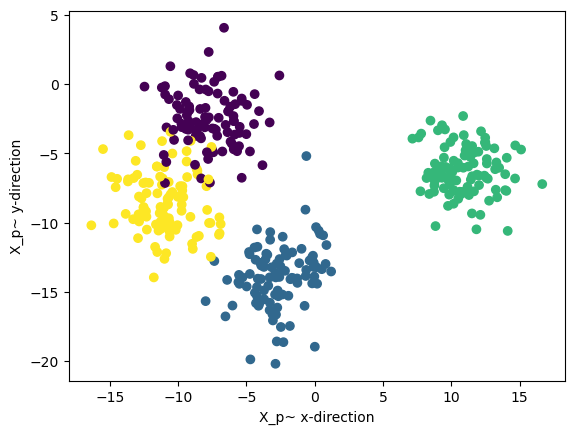

In [99]:
plt.scatter(X_p[:, 0], X_p[:, 1], marker="o", c=y)
plt.xlabel("X_p~ x-direction")
plt.ylabel("X_p~ y-direction")
plt.show()

The scatter plots of our untouched data in Fig. A has defined classes, but with high variance / overlap and less pronounced (separation beween) centroids, we can't effectively classify. Seeing in Fig. B, we see that the cluster of green points has effectively been projected into its own region of he map, completely distinct from the rest of the clusters. We could effectively classify the points in the green group by as those greater than 5 in the projeced data's X direction.

In theory, we could also perform classification criterion on the blue group, whose center is about 